## 4.2 Data Cleaning

### 4.2.1 Handling Missing Values
In real-world datasets, missing data is a common issue and can arise due to various reasons such as
data entry errors, unavailability of information, or incomplete records. Handling missing values is a
critical step in the data preprocessing pipeline because many machine learning models cannot work
with missing data.

There are several strategies to handle missing values:

• Removing Missing Data: If the amount of missing data is minimal, it is sometimes best to
remove those records.

• Imputation: Filling missing values with substitute data (mean, median, mode, or more
advanced techniques like K-Nearest Neighbors imputation).

• Flagging: Adding a flag to indicate the presence of missing data, which might provide additional insight for models.

In [6]:
import pandas as pd
# Sample data with missing values
data = { 'Feature 1': [1, 2, None, 4],
         'Feature 2': [5, None, 7, 8],
         'Feature 3': [9, 10, 11, None] }

df = pd.DataFrame(data)

df_dropped = df.dropna()

print( "Data ␣ a f t e r ␣ removing ␣ m i s s i n g ␣ v a l u e s : \n" , df_dropped )

Data ␣ a f t e r ␣ removing ␣ m i s s i n g ␣ v a l u e s : 
    Feature 1  Feature 2  Feature 3
0        1.0        5.0        9.0


### 4.2.2 Removing Outliers
An outlier is a single data point that goes far outside the average value of a group of statistics.
Outliers may be exceptions that stand outside individual samples of populations as well. In a more
general context, an outlier is an individual data point that is markedly different from the norm in
some respect. A common method for removing outliers is using the Z-score or IQR (Interquartile
Range).

### 4.3 Normalization and Scaling
Feature scaling and normalization are crucial techniques in preparing data for machine learning
models. They help standardize the data so that models can learn efficiently. Feature scaling refers
to standardizing the range of independent variables or features in a dataset. It makes sure features
with larger ranges do not dominate those with smaller ranges. Some reasons for why feature scaling
is important:

• Helps optimization algorithms converge faster for models like linear regression and neural
networks

• Manages outlier effects

• Prevents bias from variables with larger ranges

• Allows comparison of model coefficients

Overall, feature scaling enables more accurate and faster model training.
Normalization transforms data in order to map values within a specific range, like 0 to 1. It
changes the shape of the data’s distribution while keeping proportional differences between values.
Reasons to normalize data:

• Improves model convergence for optimization and gradient descent

• Regularizes model weights, preventing large fluctuations

• Enables intuitive comparison between features

• Simplifies data while retaining useful information

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Sample data
data = {'Feature1': [1, 2, 3, 4],
        'Feature2': [10, 15, 14, 20]}
df = pd.DataFrame(data)
# Standardization (Z-score)
scaler = StandardScaler()
df_standardized = pd.DataFrame(
    scaler.fit_transform(df), columns=df.columns)
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    minmax_scaler.fit_transform(df), columns=df.columns)
print("Standardized Data:\n", df_standardized)
print("\nMin-Max Scaled Data:\n", df_scaled)

Standardized Data:
    Feature1  Feature2
0 -1.341641 -1.333539
1 -0.447214  0.070186
2  0.447214 -0.210559
3  1.341641  1.473911

Min-Max Scaled Data:
    Feature1  Feature2
0  0.000000       0.0
1  0.333333       0.5
2  0.666667       0.4
3  1.000000       1.0


## 4.4 Practical Exercises: First set
For this first set of exercises, the relevant dataset is available via the following link: Click here to
see and download the dataset

• Collect the relevant dataset from the given Dataset folder, and handle the missing values in
this dataset.

• Are there any outliers in the dataset? If yes, remove the outliers.

• Normalize the appropriate features and show the results.

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

file_path = "cervical-cancer_csv.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df = df.replace('?', np.nan)

year_columns = [
    'Smokes (years)',
    'Hormonal Contraceptives (years)',
    'IUD (years)',
    'STDs: Time since first diagnosis',
    'STDs: Time since last diagnosis'
]

features_to_process = [
    'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
    'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)',
    'IUD (years)', 'STDs (number)', 'STDs: Time since first diagnosis',
    'STDs: Time since last diagnosis'
]

df_cleaned = df.copy()

for col in features_to_process:
    s = df_cleaned[col].dropna() # Use non-NaN values for calculation
    
    if not s.empty:
        Q1 = s.quantile(0.25)
        Q3 = s.quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers (Winsorization)
        # Values below the lower bound are set to the lower bound
        df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
        # Values above the upper bound are set to the upper bound
        df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])

scaler = MinMaxScaler()

# for col in features_to_process:
    # Scale only the non-NaN values (NaNs will remain NaN)
    # non_nan_mask = df_cleaned[col].notna()
    # data_to_scale = df_cleaned[col][non_nan_mask].values.reshape(-1, 1)
    
    # # Apply the scaler and place the scaled values back
    # df_cleaned.loc[non_nan_mask, col] = scaler.fit_transform(data_to_scale).flatten()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# df_cleaned[year_columns] = df_cleaned[year_columns].apply(np.floor).astype('Int64')

print("\nDataFrame Head after Outlier Capping and Min-Max Normalization:")
print(df_scaled[features_to_process].head())

df_scaled.to_csv('cervical-cancer_cleaned_normalized.csv', index=False)


print("done")





DataFrame Head after Outlier Capping and Min-Max Normalization:
   Number of sexual partners  First sexual intercourse  Num of pregnancies  \
0                   0.857143                  0.375000            0.166667   
1                   0.000000                  0.291667            0.166667   
2                   0.000000                       NaN            0.166667   
3                   1.000000                  0.458333            0.666667   
4                   0.571429                  0.875000            0.666667   

   Smokes (years)  Smokes (packs/year)  Hormonal Contraceptives (years)  \
0             0.0                  0.0                              0.0   
1             0.0                  0.0                              0.0   
2             0.0                  0.0                              0.0   
3             0.0                  0.0                              0.4   
4             0.0                  0.0                              1.0   

   IUD (years) 

## 5.2 Encoding Categorical Variables

Categorical encoding is the process of converting categorical variables into numeric features. It is an
important feature engineering step in most data science projects, as it ensures that machine learning
algorithms can appropriately handle and interpret categorical data.

In [18]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
# Sample categorical data
data={'Color':['Red','Blue','Green','Blue','Red']}
df=pd.DataFrame(data)
# Label Encoding
label_encoder=LabelEncoder()
df['Color_LabelEncoded']=label_encoder.fit_transform(df['Color'])
# One-Hot Encoding
onehot_encoder=OneHotEncoder()
color_encoded=onehot_encoder.fit_transform(df[['Color']])
print("Label Encoded:\n",df)
print("\nOne-Hot Encoded:\n",color_encoded)

Label Encoded:
    Color  Color_LabelEncoded
0    Red                   2
1   Blue                   0
2  Green                   1
3   Blue                   0
4    Red                   2

One-Hot Encoded:
   (0, 2)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (4, 2)	1.0


## 5.3 Feature Interaction and Polynomial Features

Interaction features involve combining two or more features. This is useful for capturing the relationship between multiple features and how they collectively influence the target variable. Interaction
features are often created by performing operations like addition, subtraction, multiplication, or
division between two or more features. Polynomial features involve taking an existing feature and
raising it to a power. This is useful for capturing non-linear relationships between the feature and
the target variable.

In [19]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
# Sample data
data={'Feature1':[1,2,3],'Feature2':[4,5,6],'Feature3':[7,8,9]}
df=pd.DataFrame(data)
print("Original Data:\n",df)
# Initialize PolynomialFeatures to create interaction terms (degree 2)
poly=PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)
# Fit and transform the data to generate interaction terms
interaction_features=poly.fit_transform(df)
# Get the names of the interaction features
interaction_feature_names=poly.get_feature_names_out(input_features=df.columns)
# Convert the interaction features into a DataFrame for better visualization
interaction_df=pd.DataFrame(interaction_features,columns=interaction_feature_names)
print("\nData with Interaction Terms:\n",interaction_df)

Original Data:
    Feature1  Feature2  Feature3
0         1         4         7
1         2         5         8
2         3         6         9

Data with Interaction Terms:
    Feature1  Feature2  Feature3  Feature1 Feature2  Feature1 Feature3  \
0       1.0       4.0       7.0                4.0                7.0   
1       2.0       5.0       8.0               10.0               16.0   
2       3.0       6.0       9.0               18.0               27.0   

   Feature2 Feature3  
0               28.0  
1               40.0  
2               54.0  


## 5.4 Feature Selection

Feature selection is the method of reducing the input variable to your model by retaining only
relevant data and getting rid of noise in data. It is the process of automatically choosing relevant
features for your machine learning model based on the type of problem you are trying to solve. Some
example methods for feature selections are as follows.

### Example 1: Recursive Feature Elimination (RFE): 
Recursive Feature Elimination selects features by recursively considering smaller sets of features. It ranks the importance of each feature
using a base model, and then eliminates the least important features one by one.

In [20]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Load the dataset
data=load_breast_cancer()
X=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.Series(data.target)
# Initialize the model
model=LogisticRegression(max_iter=10000)
# Initialize RFE (Recursive Feature Elimination)
rfe=RFE(estimator=model,n_features_to_select=5)
# Fit RFE
rfe.fit(X,y)
# Selected features
selected_features=X.columns[rfe.support_]
print("Selected Features by RFE:\n",selected_features)

Selected Features by RFE:
 Index(['mean radius', 'texture error', 'worst radius', 'worst compactness',
       'worst concavity'],
      dtype='object')


### Example 2: SelectKBest 
SelectKBest selects the top K features based on univariate statistical tests. 
Commonly used tests include chi-squared for classification and f_regression for regression

In [21]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.datasets import load_breast_cancer
# Load the dataset
data=load_breast_cancer()
X=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.Series(data.target)
# Apply SelectKBest with ANOVA F-test
select_k_best=SelectKBest(score_func=f_classif,k=5)
# Fit and transform the data
X_new=select_k_best.fit_transform(X,y)
# Get selected feature names
selected_features=X.columns[select_k_best.get_support()]
print("Selected Features by SelectKBest:\n",selected_features)

Selected Features by SelectKBest:
 Index(['mean perimeter', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst concave points'],
      dtype='object')


## Example 3: Feature Selection Using Feature Importance (Random Forest) 
Feature importance can be used to select the most important features based on a tree-based model like Random Forest.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
# Load the dataset
data=load_breast_cancer()
X=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.Series(data.target)
# Train a RandomForest Classifier
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X,y)
# Get feature importance
feature_importances=model.feature_importances_
# Create a DataFrame for feature importance
feature_df=pd.DataFrame({'Feature':X.columns,'Importance':feature_importances})
# Sort features by importance
feature_df=feature_df.sort_values(by='Importance',ascending=False)
# Select top 5 important features
top_features=feature_df['Feature'].head(5)
print("Top 5 Features by Importance:\n",top_features)

Top 5 Features by Importance:
 23              worst area
27    worst concave points
7      mean concave points
20            worst radius
22         worst perimeter
Name: Feature, dtype: object


## 5.5 Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a powerful unsupervised technique used for dimensionality reduction in machine learning. PCA is particularly useful when dealing with large datasets with
many features (i.e., high-dimensional data). Reducing the number of features simplifies the model,
which in turn mitigates the computational complexity, and can improve performance, especially in
resource-constrained environments like embedded systems.
### 5.5.1 Key Concepts of PCA
• Dimensionality Reduction: PCA reduces the number of features (dimensions) by finding
a new set of orthogonal axes (principal components) that capture the maximum variance in
the data. These components are linear combinations of the original features.

• Principal Components: The principal components are new features that are formed by
projecting the original data onto a lower-dimensional space. The first principal component
captures the most variance, the second principal component captures the next most variance,
and so on.

• Explained Variance: The amount of information captured by each principal component
is measured by the associated explained variance. The goal is to retain the majority of the
dataset’s variance while reducing the number of dimensions

• Feature Orthogonality: One of the key benefits of PCA is that the resulting principal
components are uncorrelated (orthogonal). This can help in scenarios where features are
highly correlated, as PCA reduces redundancy.

In [23]:
from sklearn.decomposition import PCA
# Sample data
data={'Feature1':[2,4,6,8],'Feature2':[1,3,5,7],'Feature3':[10,15,20,25]}
df=pd.DataFrame(data)
# Apply PCA
pca=PCA(n_components=2)
df_pca=pd.DataFrame(pca.fit_transform(df),columns=['PC1','PC2'])
print("Original Data:\n",df)
print("\nData after PCA:\n",df_pca)

Original Data:
    Feature1  Feature2  Feature3
0         2         1        10
1         4         3        15
2         6         5        20
3         8         7        25

Data after PCA:
         PC1  PC2
0 -8.616844 -0.0
1 -2.872281 -0.0
2  2.872281 -0.0
3  8.616844  0.0


### 5.5.2 Why PCA is Useful in Embedded Machine Learning
• Reducing Model Complexity: For embedded systems, computational resources like memory and processing power are limited. PCA helps reduce the feature space, simplifying the
model and making it more efficient to deploy on embedded devices.

• Noise Reduction: By focusing on the components that explain the most variance, PCA can
help remove noise and irrelevant features, improving the model’s performance and generalization.

• Faster Computation: With fewer features, models trained on the reduced feature set will
run faster, which is crucial in real-time applications on embedded systems.
### 5.5.3 Steps Involved in PCA
1. Standardization: Since PCA is affected by the scale of the data, the first step is to standardize the features so that each feature contributes equally to the analysis.
2. Covariance Matrix: PCA computes the covariance matrix of the features to measure how
the variables co-vary with each other. It helps identify relationships between features.
3. Eigenvectors and Eigenvalues: The eigenvectors of the covariance matrix determine the
direction of the new principal components, and the eigenvalues represent the magnitude of
variance explained by each principal component.
4. Projection to New Space: The original data is projected onto the new principal components
(axes), resulting in a lower-dimensional representation of the data.

Principal Components:
         PC1           PC2
0 -2.449490 -1.719950e-16
1 -1.224745  5.733167e-17
2  0.000000  0.000000e+00
3  1.224745 -5.733167e-17
4  2.449490 -1.146633e-16
Explained Variance (PC1, PC2): [1.00000000e+00 3.28692044e-33]


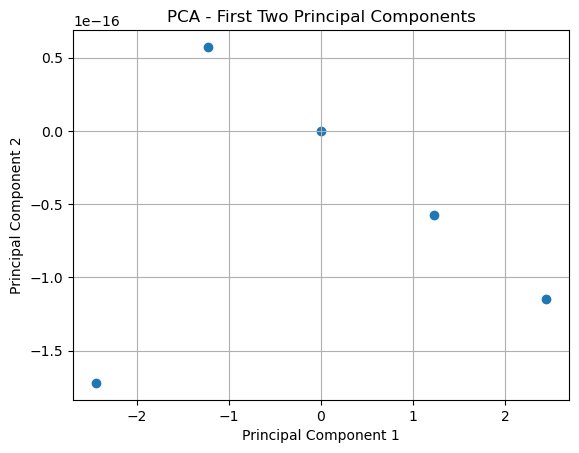

In [24]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Sample data
data={'Feature1':[2,4,6,8,10],'Feature2':[1,3,5,7,9],'Feature3':[10,20,30,40,50]}
df=pd.DataFrame(data)
# Standardize the features
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
# Apply PCA to reduce to 2 components
pca=PCA(n_components=2)
pca_result=pca.fit_transform(scaled_data)
# Convert result into a DataFrame
pca_df=pd.DataFrame(pca_result,columns=['PC1','PC2'])
print("Principal Components:\n",pca_df)
# Variance explained by each component
explained_variance=pca.explained_variance_ratio_
print("Explained Variance (PC1, PC2):",explained_variance)
# Plot the first two principal components
plt.scatter(pca_df['PC1'],pca_df['PC2'])
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### 5.5.4 When to Use PCA
• High-Dimensional Data: When you have a large number of features and want to reduce
the dimensionality without losing much information.

• Multicollinearity: When features are highly correlated, PCA can help reduce the redundancy.

• Feature Selection: When you want to keep only the most significant features that explain
the majority of the variance.

• Preprocessing for Models: When deploying models in embedded systems where memory
and computational power are limited.

### 5.5.5 Caveats of PCA
• Interpretability: The new features (principal components) are linear combinations of the
original features, so they may not be as interpretable as the original features.

• Not Suitable for Non-Linear Data: PCA is a linear method, so it may not work well if
the data has non-linear relationships.

• Scaling Required: PCA is sensitive to the scale of the data, so it’s important to standardize
the features before applying PCA.

PCA is a powerful tool for dimensionality reduction, helping to simplify models and reduce computational load, especially in embedded machine learning systems. By retaining the most important
information while discarding noise and irrelevant features, PCA enables more efficient processing
and faster inference in resource-constrained environments.

# 6 Introduction to Exploratory Data Analysis (EDA) and Visualization
## 6.1 Overview of Exploratory Data Analysis and Visualization
Exploratory Data Analysis (EDA) is a crucial step in the data science pipeline. It involves analyzing
and summarizing the main characteristics of a dataset, often using visual techniques. EDA helps in
understanding the distribution, patterns, relationships, and outliers in the data, aiding in making
informed decisions for further data preprocessing, modeling, and feature engineering.
### 6.1.1 Univariate Analysis
Univariate analysis focuses on analyzing a single variable at a time to understand its distribution,
central tendency, and spread. Common techniques include:

• Histograms: Visualize the distribution of a numerical variable.

• Boxplots: Detect outliers and visualize the spread of data.

• Bar Charts: Visualize the frequency of categorical variables.
### 6.1.2 Bivariate Analysis
Bivariate analysis examines the relationship between two variables. It helps in identifying correlations and interactions. Techniques include:

• Scatter Plots: Visualize the relationship between two numerical variables.

• Correlation Matrix and Heatmaps: Analyze correlations between multiple numerical variables.

• Grouped Boxplots: Compare distributions across different categories.
### 6.1.3 Multivariate Analysis
Multivariate analysis involves analyzing more than two variables at once. It helps in understanding
complex interactions between multiple variables. Techniques include:

• Pair Plots: Visualize pairwise relationships between several variables.

• 3D Scatter Plots: Visualize relationships between three numerical variables.

• Principal Component Analysis (PCA): Reduce the dimensionality of the data while retaining most of the variance.

### 6.1.4 Descriptive Statistics
Descriptive statistics summarize the key features of the data, providing insights into the central
tendency, dispersion, and shape of the data distribution. Key metrics include:

• Mean, Median, Mode: Central tendency measures.

• Variance and Standard Deviation: Measure of data spread.

• Skewness and Kurtosis: Analyze the asymmetry and tail heaviness of the distribution.

### 6.1.5 Outlier Detection
Outliers are extreme values that deviate significantly from other data points. Detecting outliers is
important to avoid skewing model performance. Common methods include:

• Boxplots: Visualize and detect outliers.

• Z-Score Method: Identify data points that are far from the mean.

• Interquartile Range (IQR): Identify outliers based on the IQR method.

### 6.1.6 Missing Data Analysis
Handling missing data is an essential part of data preprocessing. Missing values can be visualized
and analyzed using:

• Missing Value Heatmap: Visualize patterns of missing data.

• Missing Value Count: Summarize the extent of missing data in each feature.

### 6.1.7 Feature Relationships and Aggregation
Feature relationships and data aggregation help in summarizing and understanding how different
variables interact:

• Correlation Matrix: Identify relationships between multiple features.

• GroupBy and Aggregate: Group data by categories and calculate summary statistics such as mean, sum, or count.

### 6.1.8 Dimensionality Reduction
Dimensionality reduction techniques help reduce the number of features while preserving as much
information as possible:

• Principal Component Analysis (PCA): Reduce dimensionality by transforming data into principal components.

• t-SNE (t-Distributed Stochastic Neighbor Embedding): Visualize high-dimensional data in a lower-dimensional space (e.g., 2D or 3D).
### 6.1.9 Time Series Analysis
Time series analysis is used when data is collected over time. Common techniques include:

• Line Plots: Visualize changes in data over time.

• Autocorrelation: Measure the relationship of the data with its past values.

• Time Series Decomposition: Break down a time series into trend, seasonality, and residual components.
### 6.1.10 Categorical Data Analysis
Categorical variables require specific techniques to explore their distribution and relationships:

• Count Plots: Visualize the frequency of categorical variables.

• Stacked Bar Charts: Show proportions of multiple categorical variables.
### 6.1.11 Geospatial Analysis
For geographical data, visualization on maps can help identify spatial patterns:

• Choropleth Maps: Show data distribution over geographical regions.

• Heatmaps: Highlight dense areas in geospatial data.

## 6.2 Sample Python codes for EDA Visualization
### 6.2.1 Univariate Analysis
Histogram:

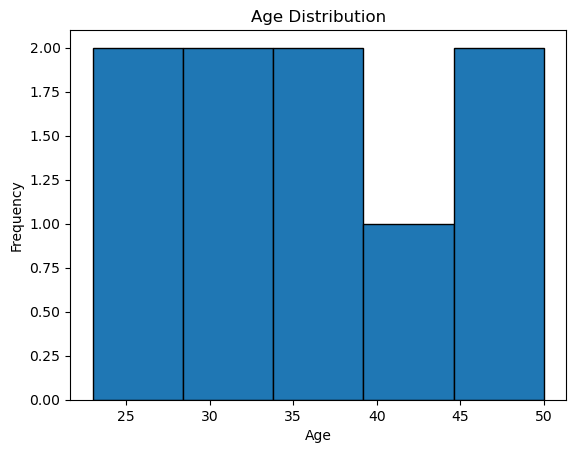

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
# Sample data
data={'Age':[23,45,31,35,42,50,28,31,35]}
df=pd.DataFrame(data)
# Histogram
plt.hist(df['Age'],bins=5,edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Box plot:

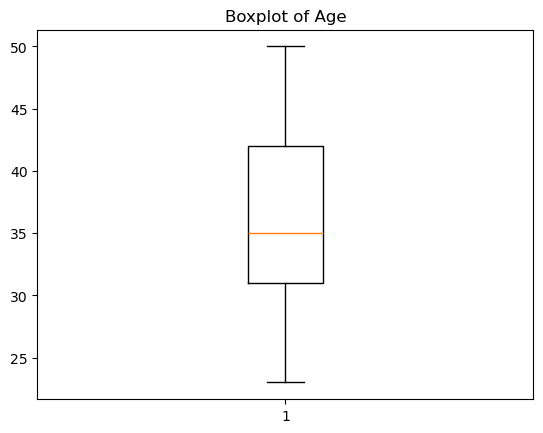

In [26]:
# Boxplot
plt.boxplot(df['Age'])
plt.title('Boxplot of Age')
plt.show()

### 6.2.2 Bivariate Analysis
Scatter Plot:

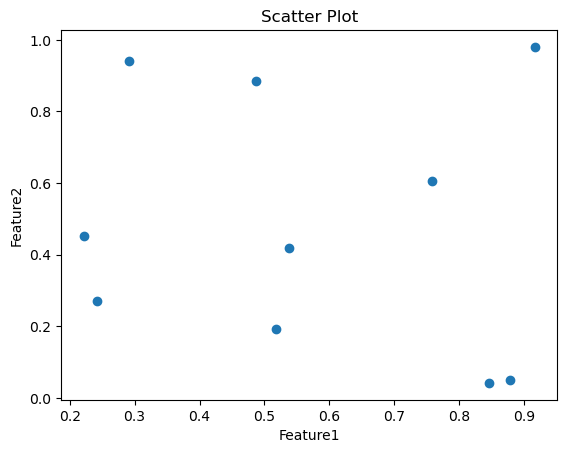

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Sample data
data={'Feature1':np.random.rand(10),'Feature2':np.random.rand(10)}
df=pd.DataFrame(data)
# Scatter Plot
plt.scatter(df['Feature1'],df['Feature2'])
plt.title('Scatter Plot')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

Correlation Matrix/Heatmap:

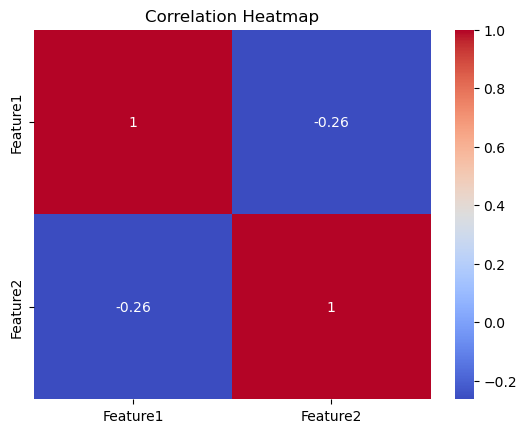

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Sample data (assuming df from previous context)
data={'Feature1':np.random.rand(10),'Feature2':np.random.rand(10)}
df=pd.DataFrame(data)
# Correlation matrix
corr_matrix=df.corr()
# Heatmap
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 6.2.3 Multivariate Analysis
Pair Plot

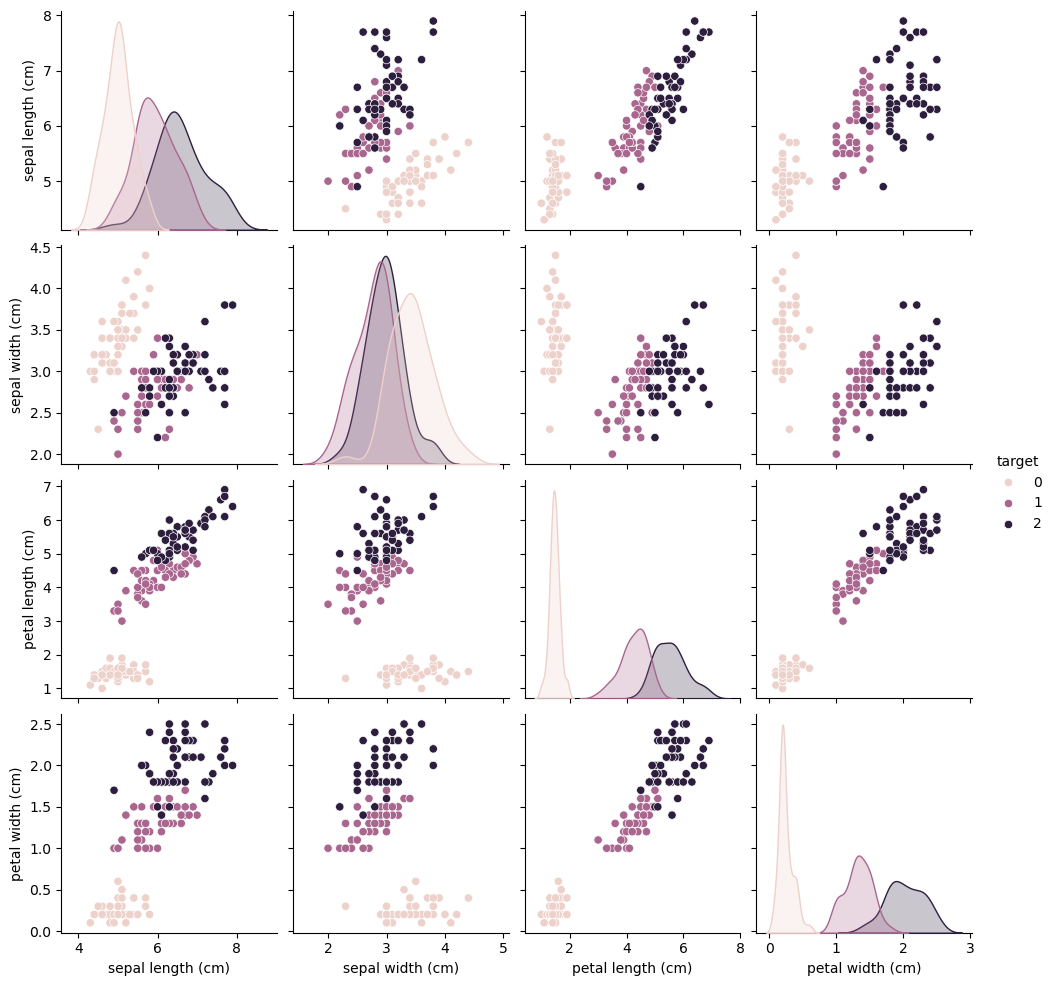

In [29]:
# Sample data
from sklearn.datasets import load_iris
import seaborn as sns

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Pair Plot
sns.pairplot(df, hue='target')
plt.show()

### 6.2.4 Descriptive Statistics

In [30]:
# Descriptive statistics
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


### 6.2.5 Outlier Detection
Boxplot for Outliers

Index(['Age'], dtype='object')


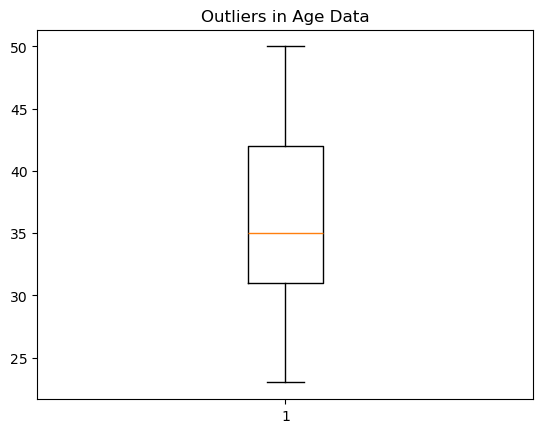

In [35]:
# Sample data
from sklearn.datasets import load_iris
import seaborn as sns

# Load dataset
data = {'Age': [23, 45, 31, 35, 42, 50, 28, 31, 35]}
df = pd.DataFrame(data)

print(df.keys())
# Boxplot for outlier detection
plt.boxplot(df['Age'])
plt.title('Outliers in Age Data')
plt.show()

IQR Method to Detect and Remove Outliers

In [40]:
# Removing outliers using IQR
file_path = "kidney_disease.csv"
df = pd.read_csv(file_path)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
df_outliers_removed = df[~((df['age'] < (Q1 - 1.5 * IQR)) |(df['age'] > (Q3 + 1.5 * IQR)))]
print(df_outliers_removed)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
5      5  60.0  90.0  1.015  3.0  0.0     NaN       NaN  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
2    

### 6.2.6 Missing Data Analysis
Missing Value Heatmap

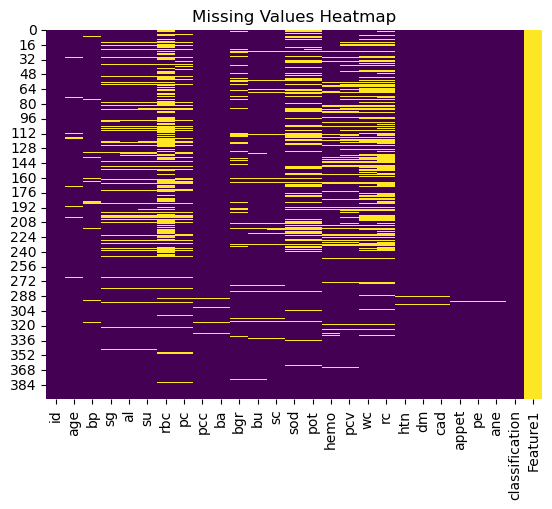

In [41]:
# Introduce missing values in data
# file_path = "kidney_disease.csv"
# df = pd.read_csv(file_path)
df_missing = df.copy()
df_missing.loc[2:4, 'Feature1'] = np.nan

# Missing values heatmap
sns.heatmap(df_missing.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### 6.2.7 Feature Relationships
Correlation Matrix

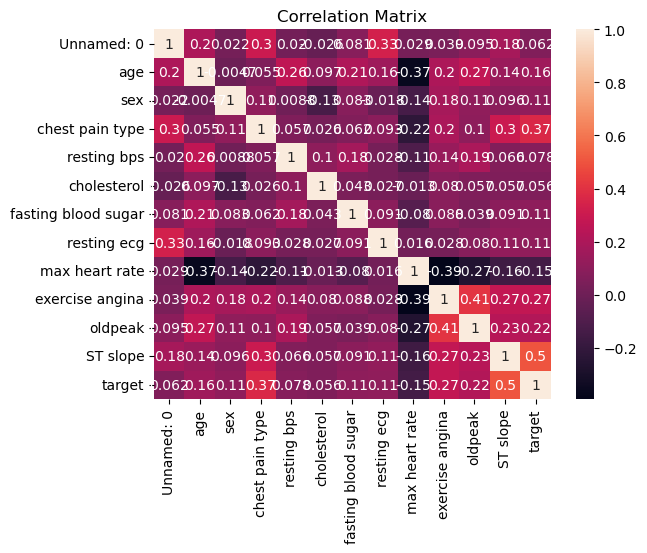

In [44]:
file_path = "Dataset Heart Disease.csv"
df = pd.read_csv(file_path)
# Correlation matrix
corr_matrix = df.corr()

# Heatmap visualization
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### 6.2.8 Data Aggregation and Grouping
GroupBy and Aggregate

In [45]:
# Sample data
data = {'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
        'Value': [10, 15, 10, 25, 30, 35]}
df = pd.DataFrame(data)

# Group by category and aggregate
grouped_df = df.groupby('Category').agg({'Value': ['mean', 'sum']})
print(grouped_df)

         Value    
          mean sum
Category          
A         12.5  25
B         17.5  35
C         32.5  65


### 6.2.9 Time Series Analysis
Line Plot

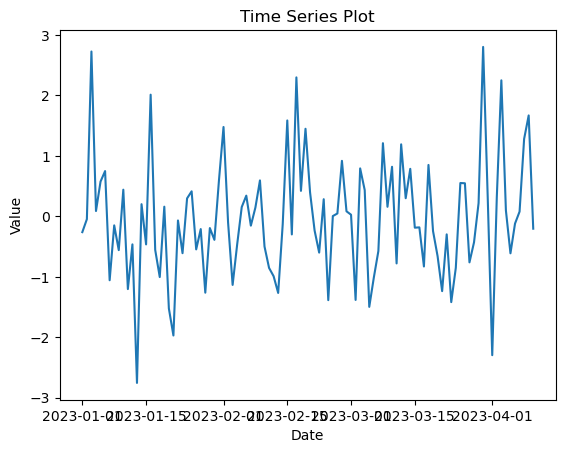

In [46]:
# Sample time series data
dates = pd.date_range(start='2023-01-01', periods=100)
values = np.random.randn(100)
time_series_df = pd.DataFrame({'Date': dates, 'Value': values})

# Line plot for time series
plt.plot(time_series_df['Date'], time_series_df['Value'])
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

### 6.2.10 Data Distribution Analysis
Quantile-Quantile (Q-Q) Plot

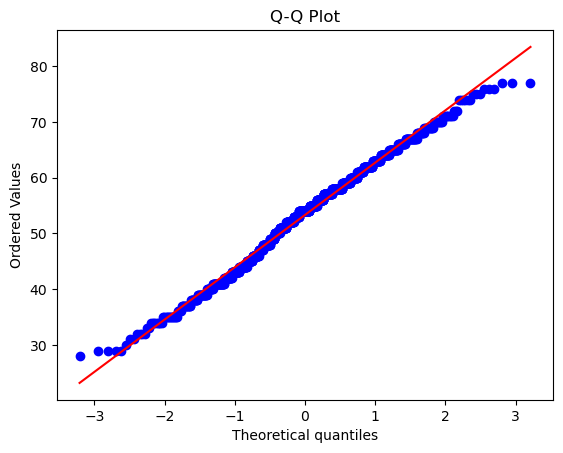

In [48]:
import scipy.stats as stats

file_path = "Dataset Heart Disease.csv"
df = pd.read_csv(file_path)

# Q-Q Plot
stats.probplot(df['age'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

### 6.2.11 Categorical Variable Analysis
Count Plot

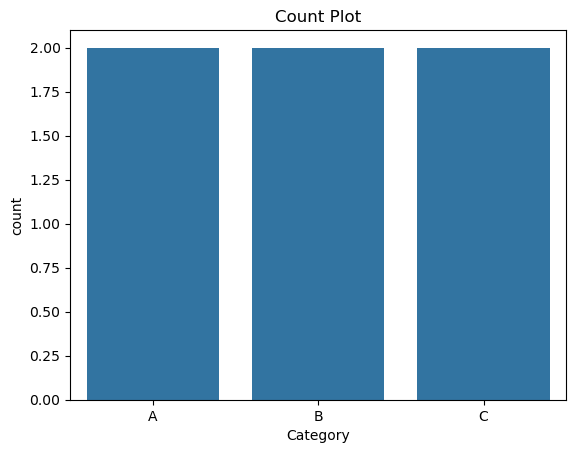

In [49]:
# Sample data
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'C']}
df = pd.DataFrame(data)

# Count Plot
sns.countplot(x='Category', data=df)
plt.title('Count Plot')
plt.show()

### 6.2.12 Text Data Exploration
Word Cloud

In [50]:
from wordcloud import WordCloud

# Sample text data
text_data = 'Machine_learning_is_amazing_Data_science_is_an_interesting_field_Machine_learning!'

# Generate word cloud
wordcloud = WordCloud().generate(text_data)

# Display word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

### 6.2.13 Geospatial Analysis
Scatter Map Plot

In [51]:
import geopandas as gpd

# Load a sample dataset of world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot world map
world.plot()
plt.title('World Map Plot')
plt.show()

ModuleNotFoundError: No module named 'geopandas'

### 6.2.14 Target Variable Distribution
Class Imbalance Check (Bar Plot)

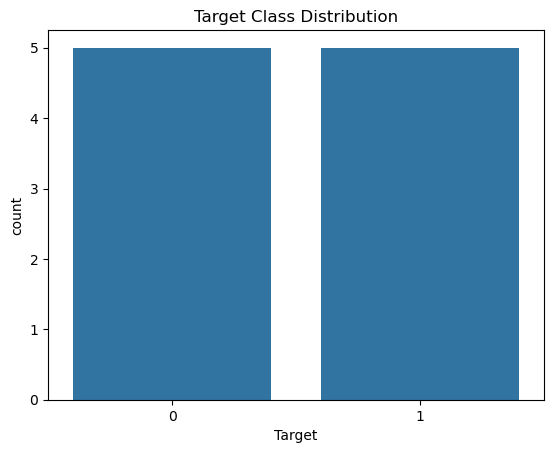

In [54]:
# Sample data
target_data = {'Target': [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]}
df_target = pd.DataFrame(target_data)

# Bar plot for class distribution
sns.countplot(x='Target', data=df_target)
plt.title('Target Class Distribution')
plt.show()